# Proyecto red neuronal RNN:
##Predicicción de los precios de la bolsa usando redes LSTM con Keras

El objetivo de este proyecto es practicar el entrenamiento de una red neuronal tipo RNN (Recursive Neural Network) con la finalidad de entrenar un modelo que permita hacer predicciones en base a datos ordenados de manera secuencial (series temporales). Se utilizará la librería Keras para construir la red neuronal.

# Parte 1: Preprocesamiento de los datos

In [1]:
# Importando algunas de las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Se carga el conjunto de datos de series temporales correspondientes a datos financieros de TATA Motors, de National Stock Exchange, que pueden encontrarse [aquí](https://github.com/BrayanRamirezCamacho/Seminario_de_Fisica_Computacional/tree/main/Proyecto_RNN).

In [2]:
# Cargando el conjunto de datos
url = 'https://raw.githubusercontent.com/BrayanRamirezCamacho/Seminario_de_Fisica_Computacional/main/Proyecto_RNN/NSE-TATAGLOBAL.csv'
dataset_train = pd.DataFrame(pd.read_csv(url))
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


La columna 'Open' es el precio inicial, mientras que la columna 'Close' es el precio final de la bolsa en un día particular. Las columnas 'High' y 'Low' representan los precios más alto y más bajo para un día en específico.

Para el análisis se utilizarán las columnas 'Open' y 'High'.

Visualización de la muestra cargada:

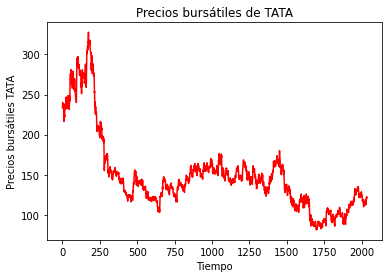

In [20]:
stock_price = dataset_train.iloc[:, 1:2].values
plt.plot(stock_price, color = 'red')
plt.title('Precios bursátiles de TATA')
plt.xlabel('Tiempo')
plt.ylabel('Precios bursátiles TATA')
plt.show()

Escalamiento de los datos:

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [21]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

Creando una estructura de datos con 60 pasos de tiempo y 1 salida:

In [5]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Remodelado de los datos (reshape):

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Parte 2: Construcción de la red neuronal recurrente

In [7]:
#Importando las funcionalidades de Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Para la arquitectura se proponen 4 capas LSTM, cada una con regularización DropOut de un 20%, y también una capa densa de salida:

In [8]:
# Inicialización
regressor = Sequential()

# Capas LSTM y de salida
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

Compilación y entrenamiento de la RNN:

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

results = regressor.fit(X_train, y_train, epochs = 80, batch_size = 16)

Epoch 1/80
124/124 [==============================] - 19s 101ms/step - loss: 6.3081e-04
Epoch 2/80
124/124 [==============================] - 13s 106ms/step - loss: 7.3468e-04
Epoch 3/80
124/124 [==============================] - 13s 105ms/step - loss: 6.9330e-04
Epoch 4/80
124/124 [==============================] - 13s 106ms/step - loss: 6.1819e-04
Epoch 5/80
124/124 [==============================] - 13s 106ms/step - loss: 6.4788e-04
Epoch 6/80
124/124 [==============================] - 13s 108ms/step - loss: 5.9134e-04
Epoch 7/80
124/124 [==============================] - 13s 108ms/step - loss: 5.5878e-04
Epoch 8/80
124/124 [==============================] - 14s 109ms/step - loss: 7.2158e-04
Epoch 9/80
124/124 [==============================] - 13s 109ms/step - loss: 7.7531e-04
Epoch 10/80
124/124 [==============================] - 14s 109ms/step - loss: 6.4655e-04
Epoch 11/80
124/124 [==============================] - 13s 108ms/step - loss: 6.3959e-04
Epoch 12/80
124/124 [=========

Visualización de la pérdida (loss) del modelo:

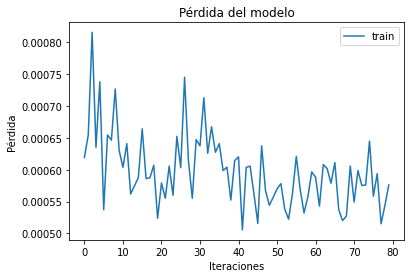

In [27]:
plt.plot(results.history['loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteraciones')
plt.legend(['train', 'test'])

#guardamos la imagen resultante
plt.savefig('model_loss.png')

plt.show()

# Parte 3: Haciendo las predicciones y visualizando los resultados

Para el conjunto de prueba, se cargan datos bursátiles reales del 2017:

In [10]:
url2 = 'https://raw.githubusercontent.com/BrayanRamirezCamacho/Seminario_de_Fisica_Computacional/main/Proyecto_RNN/tatatest.csv'
dataset_test = pd.DataFrame(pd.read_csv(url2))
real_stock_price = dataset_test.iloc[:, 1:2].values

In [11]:
dataset_test.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


Haciendo las predicciones de los precios de la bolsa para el mismo año (2017):

In [12]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


Visualizando los resultados de las predicciones junto a los datos verdaderos:

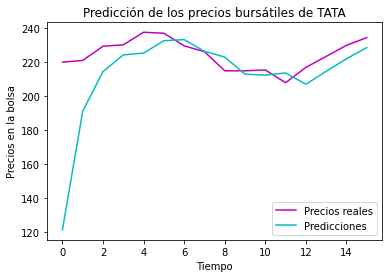

In [36]:
plt.plot(real_stock_price, color = 'm', label = 'Precios reales')
plt.plot(predicted_stock_price, color = 'c', label = 'Predicciones')
plt.title('Predicción de los precios bursátiles de TATA')
plt.xlabel('Tiempo')
plt.ylabel('Precios en la bolsa')
plt.legend()
plt.savefig('stock_predictions.png')
plt.show()

Se aprecia que después de algunos instantes de tiempo, las predicciones del modelo se acercan a los precios verdaderos y además se reproduce la tendencia de subida o bajada de los precios.

# Variación 1.1: cambio de la configuración de la red neuronal de una  LSTM normal a Bidireccional

In [30]:
#modelo bidireccional
from tensorflow.keras.layers import Bidirectional     #capa bidireccional utilizado en RNN
regressor1_1 = Sequential()
regressor1_1.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)))
regressor1_1.add(Dense(1))

In [32]:
regressor1_1.compile(optimizer = 'Adam', loss = 'mean_squared_error')

results1_1 = regressor1_1.fit(X_train, y_train, epochs = 80, batch_size = 16)

Epoch 1/80
124/124 [==============================] - 7s 37ms/step - loss: 0.0446
Epoch 2/80
124/124 [==============================] - 5s 36ms/step - loss: 0.0015
Epoch 3/80
124/124 [==============================] - 4s 36ms/step - loss: 0.0012
Epoch 4/80
124/124 [==============================] - 4s 36ms/step - loss: 8.5361e-04
Epoch 5/80
124/124 [==============================] - 5s 36ms/step - loss: 7.2734e-04
Epoch 6/80
124/124 [==============================] - 4s 36ms/step - loss: 6.8574e-04
Epoch 7/80
124/124 [==============================] - 5s 37ms/step - loss: 6.0122e-04
Epoch 8/80
124/124 [==============================] - 5s 37ms/step - loss: 6.7996e-04
Epoch 9/80
124/124 [==============================] - 5s 36ms/step - loss: 5.1918e-04
Epoch 10/80
124/124 [==============================] - 4s 36ms/step - loss: 6.4437e-04
Epoch 11/80
124/124 [==============================] - 5s 36ms/step - loss: 5.1735e-04
Epoch 12/80
124/124 [==============================] - 5s 37ms/s

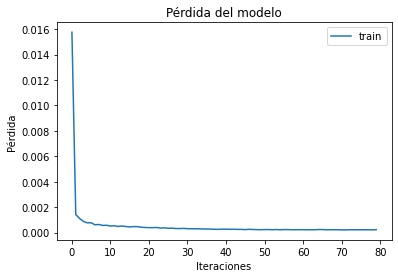

In [33]:
plt.plot(results1_1.history['loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteraciones')
plt.legend(['train', 'test'])

#guardamos la imagen resultante
plt.savefig('model_loss_1_1.png')

plt.show()

In [55]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price1_1 = regressor1_1.predict(X_test)
predicted_stock_price1_1 = sc.inverse_transform(predicted_stock_price1_1)

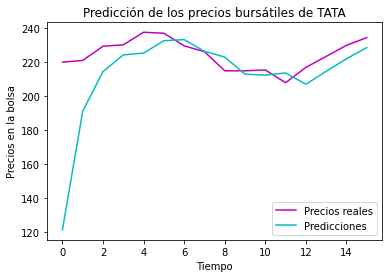

In [60]:
plt.plot(real_stock_price, color = 'm', label = 'Precios reales')
plt.plot(predicted_stock_price1_1, color = 'c', label = 'Predicciones')
plt.title('Predicción de los precios bursátiles de TATA')
plt.xlabel('Tiempo')
plt.ylabel('Precios en la bolsa')
plt.legend()
plt.savefig('stock_predictions_1_1.png')
plt.show()

# Variación 1.2: cambio de la configuración de la red neuronal de una  LSTM normal a Stacked

In [38]:
#capas "stackeadas" de LSTM
regressor1_2 = Sequential()
regressor1_2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor1_2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor1_2.add(LSTM(50, activation='relu'))
regressor1_2.add(Dense(1))

In [39]:
regressor1_2.compile(optimizer = 'Adam', loss = 'mean_squared_error')

results1_2 = regressor1_2.fit(X_train, y_train, epochs = 80, batch_size = 16)

Epoch 1/80
124/124 [==============================] - 13s 77ms/step - loss: 0.0484
Epoch 2/80
124/124 [==============================] - 10s 79ms/step - loss: 0.0018
Epoch 3/80
124/124 [==============================] - 10s 78ms/step - loss: 0.0015
Epoch 4/80
124/124 [==============================] - 10s 79ms/step - loss: 0.0015
Epoch 5/80
124/124 [==============================] - 10s 79ms/step - loss: 0.0012
Epoch 6/80
124/124 [==============================] - 10s 78ms/step - loss: 0.0011
Epoch 7/80
124/124 [==============================] - 10s 79ms/step - loss: 9.8107e-04
Epoch 8/80
124/124 [==============================] - 10s 80ms/step - loss: 8.8477e-04
Epoch 9/80
124/124 [==============================] - 10s 80ms/step - loss: 0.0011
Epoch 10/80
124/124 [==============================] - 10s 81ms/step - loss: 7.1312e-04
Epoch 11/80
124/124 [==============================] - 10s 81ms/step - loss: 9.2207e-04
Epoch 12/80
124/124 [==============================] - 10s 80ms/step 

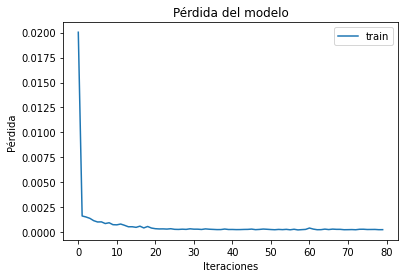

In [41]:
plt.plot(results1_2.history['loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteraciones')
plt.legend(['train', 'test'])

#guardamos la imagen resultante
plt.savefig('model_loss_1_2.png')

plt.show()

In [61]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price1_2 = regressor1_2.predict(X_test)
predicted_stock_price1_2 = sc.inverse_transform(predicted_stock_price1_2)

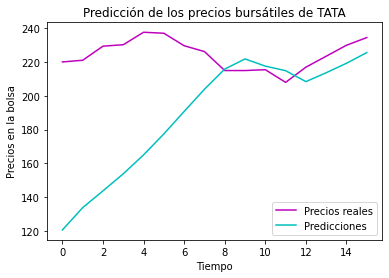

In [62]:
plt.plot(real_stock_price, color = 'm', label = 'Precios reales')
plt.plot(predicted_stock_price1_2, color = 'c', label = 'Predicciones')
plt.title('Predicción de los precios bursátiles de TATA')
plt.xlabel('Tiempo')
plt.ylabel('Precios en la bolsa')
plt.legend()
plt.savefig('stock_predictions_1_2.png')
plt.show()

# Variación 2: variación del optimizer

Se cambia el optimizer de un 'Adam' a un 'SGD' (descenso de gradiente estocástico).

In [44]:
# Inicialización
regressor2 = Sequential()

# Capas LSTM y de salida
regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))

regressor2.add(Dense(units = 1))

In [45]:
regressor2.compile(optimizer = 'SGD', loss = 'mean_squared_error')

results2 = regressor2.fit(X_train, y_train, epochs = 80, batch_size = 16)

Epoch 1/80
124/124 [==============================] - 20s 108ms/step - loss: 0.0424
Epoch 2/80
124/124 [==============================] - 14s 110ms/step - loss: 0.0239
Epoch 3/80
124/124 [==============================] - 14s 110ms/step - loss: 0.0143
Epoch 4/80
124/124 [==============================] - 13s 108ms/step - loss: 0.0067
Epoch 5/80
124/124 [==============================] - 13s 108ms/step - loss: 0.0038
Epoch 6/80
124/124 [==============================] - 13s 108ms/step - loss: 0.0035
Epoch 7/80
124/124 [==============================] - 14s 110ms/step - loss: 0.0031
Epoch 8/80
124/124 [==============================] - 14s 109ms/step - loss: 0.0029
Epoch 9/80
124/124 [==============================] - 14s 109ms/step - loss: 0.0034
Epoch 10/80
124/124 [==============================] - 14s 110ms/step - loss: 0.0029
Epoch 11/80
124/124 [==============================] - 14s 109ms/step - loss: 0.0032
Epoch 12/80
124/124 [==============================] - 13s 109ms/step - lo

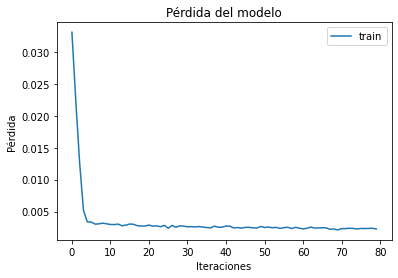

In [46]:
plt.plot(results2.history['loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteraciones')
plt.legend(['train', 'test'])

#guardamos la imagen resultante
plt.savefig('model_loss_2.png')

plt.show()

In [63]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price2 = regressor2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

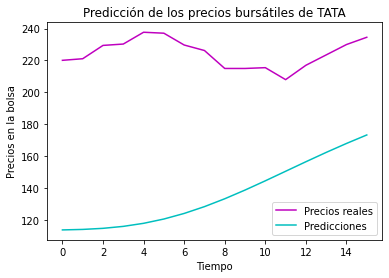

In [64]:
plt.plot(real_stock_price, color = 'm', label = 'Precios reales')
plt.plot(predicted_stock_price2, color = 'c', label = 'Predicciones')
plt.title('Predicción de los precios bursátiles de TATA')
plt.xlabel('Tiempo')
plt.ylabel('Precios en la bolsa')
plt.legend()
plt.savefig('stock_predictions_2.png')
plt.show()

# Variación 3: cambio del batch_size 
El batch_size se cambia de 16 a 32.

In [49]:
# Inicialización
regressor3 = Sequential()

# Capas LSTM y de salida
regressor3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor3.add(Dropout(0.2))

regressor3.add(LSTM(units = 50, return_sequences = True))
regressor3.add(Dropout(0.2))

regressor3.add(LSTM(units = 50, return_sequences = True))
regressor3.add(Dropout(0.2))

regressor3.add(LSTM(units = 50))
regressor3.add(Dropout(0.2))

regressor3.add(Dense(units = 1))

In [50]:
regressor3.compile(optimizer = 'Adam', loss = 'mean_squared_error')

results3 = regressor3.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
62/62 [==============================] - 14s 117ms/step - loss: 0.0210
Epoch 2/80
62/62 [==============================] - 7s 118ms/step - loss: 0.0029
Epoch 3/80
62/62 [==============================] - 7s 118ms/step - loss: 0.0026
Epoch 4/80
62/62 [==============================] - 7s 119ms/step - loss: 0.0025
Epoch 5/80
62/62 [==============================] - 7s 118ms/step - loss: 0.0028
Epoch 6/80
62/62 [==============================] - 7s 119ms/step - loss: 0.0023
Epoch 7/80
62/62 [==============================] - 7s 119ms/step - loss: 0.0020
Epoch 8/80
62/62 [==============================] - 7s 120ms/step - loss: 0.0021
Epoch 9/80
62/62 [==============================] - 7s 119ms/step - loss: 0.0023
Epoch 10/80
62/62 [==============================] - 7s 118ms/step - loss: 0.0017
Epoch 11/80
62/62 [==============================] - 7s 119ms/step - loss: 0.0022
Epoch 12/80
62/62 [==============================] - 7s 118ms/step - loss: 0.0018
Epoch 13/80
62/62 [=====

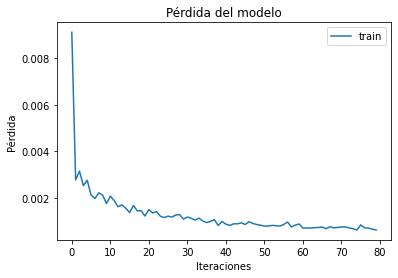

In [54]:
plt.plot(results3.history['loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteraciones')
plt.legend(['train', 'test'])

#guardamos la imagen resultante
plt.savefig('model_loss_3.png')

plt.show()

In [66]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price3 = regressor3.predict(X_test)
predicted_stock_price3 = sc.inverse_transform(predicted_stock_price3)

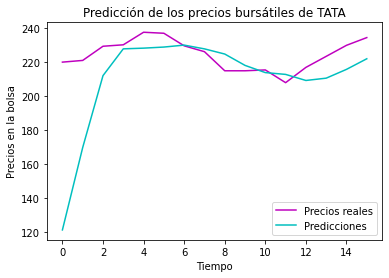

In [67]:
plt.plot(real_stock_price, color = 'm', label = 'Precios reales')
plt.plot(predicted_stock_price3, color = 'c', label = 'Predicciones')
plt.title('Predicción de los precios bursátiles de TATA')
plt.xlabel('Tiempo')
plt.ylabel('Precios en la bolsa')
plt.legend()
plt.savefig('stock_predictions_3.png')
plt.show()

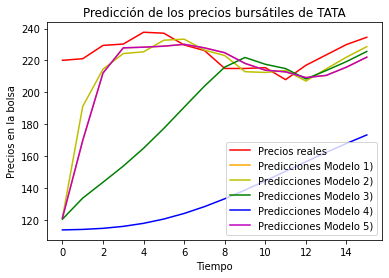

In [69]:
# PARA HACER ESTA GRÁFICA, CON TODOS LOS MODELOS A LA VEZ, SERÍA NECESARIO VOLVER A ENTRENARLOS TODOS PARA 
# CAMBIARLE EL NOMBRE A LA VARIABLE predicted_stock_price. 

plt.plot(real_stock_price, color = 'r', label = 'Precios reales')
plt.plot(predicted_stock_price, color = 'orange', label = 'Predicciones Modelo 1)')
plt.plot(predicted_stock_price1_1, color = 'y', label = 'Predicciones Modelo 2)')
plt.plot(predicted_stock_price1_2, color = 'g', label = 'Predicciones Modelo 3)')
plt.plot(predicted_stock_price2, color = 'b', label = 'Predicciones Modelo 4)')
plt.plot(predicted_stock_price3, color = 'm', label = 'Predicciones Modelo 5)')

plt.title('Predicción de los precios bursátiles de TATA')
plt.xlabel('Tiempo')
plt.ylabel('Precios en la bolsa')
plt.legend(loc='lower right')
plt.savefig('stock_predictions_todas.png')
plt.show()

# Resultados

Las gráficas de aprendizaje son:


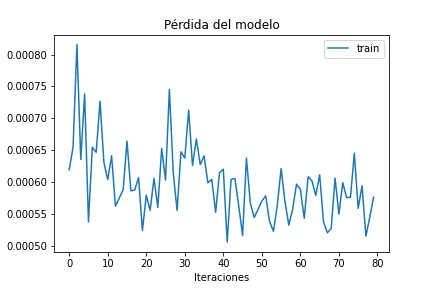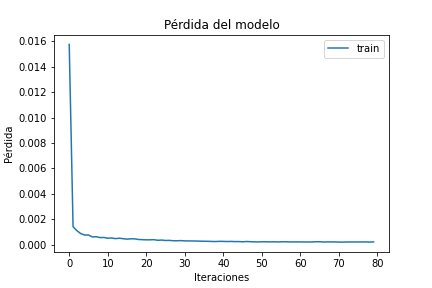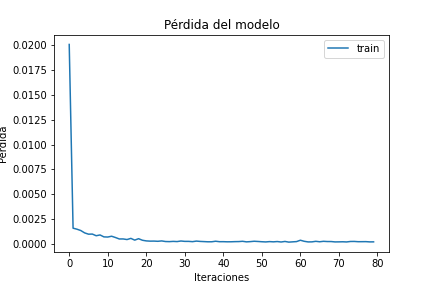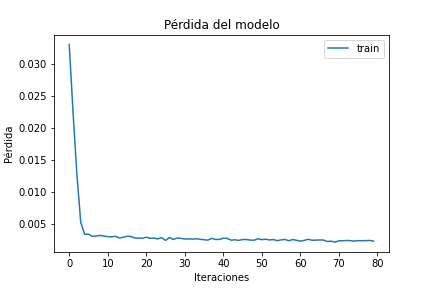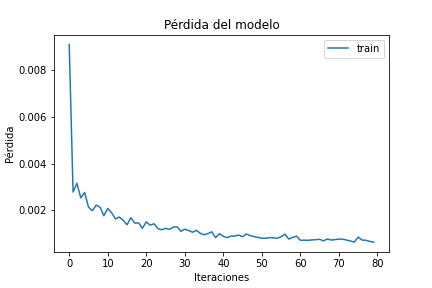

y corresponden respectivamente a:

1) El modelo con 4 capas LSTM (c/u con DropOut de un 20%) y una capa densa de salida, con optimizer 'Adam' y batch size de 16, presenta una **pérdida final de 5.7683e-04**.

2) El modelo con una capa bidireccional y una capa densa de salida, con optimizer 'Adam' y batch size de 16, presenta una **pérdida final de 2.2005e-04**.

3) El modelo con 3 capas LSTM "stackeadas" y una capa densa de salida, con optimizer 'Adam' y batch size de 16, presenta una **pérdida final de 2.6856e-04**.

4) El modelo con 4 capas LSTM (c/u con DropOut de un 20%) y una capa densa de salida, con optimizer 'SGD' (Stochastich Gradient Descent) y batch size de 16, presenta una **pérdida final de 0.0023**.

5) El modelo con 4 capas LSTM (c/u con DropOut de un 20%) y una capa densa de salida, con optimizer 'Adam' y batch size de 32, presenta una **pérdida final de 6.3256e-04**.

En todos los casos el modelo se entrenó con 80 iteraciones. Se puede notar que, a excepción del modelo 1), todos los modelos alcanzan aproximadamente su valor mínimo para las 10 iteraciones. 


Por otra parte, la gráfica con la evolución temporal de los valores de la bolsa junto con los valores predichos por cada modelo son:

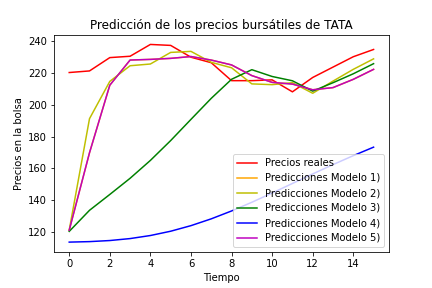

# Conclusiones

Se puede ver que la arquitectura que da mejores resultados, en cuanto a la disminución de la función de pérdida es el modelo 2),  con una capa bidireccional y una densa, optimizer 'Adam' y batch size de 16.

Adicionalmente, se puede ver en la gráfica de evolución temporal que los modelos a los cuales les toma menos tiempo acercarse a los datos reales son los 2) y 5), y el que tiene el peor desempeño es el modelo 4).

Tomando en cuenta ambos resultados, estaría justificado **elegir al modelo 2) como la mejor opción** entre estas propuestas.

# Fuentes



* Using a Keras Long Short-Term Memory (LSTM) Model to Predict Stock Prices. Recuperado de:
https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

